In [2]:
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format='retina'

# Regresion logistica (Clasificación) 
## Entropía Cruzada (Cross-entropy)
## (Función objetivo, Función de costo, Loss Function, Cost Function)


\begin{equation}
\displaystyle \large J(\theta) = -\frac{1}{m}\{\sum{_{i=1}^my^{(i)}log\ \hat{y}(\theta, x^{(i)}) + (1-y^{(i)})log\ [1-\hat{y}(\theta, x^{(i)})]\}}
\end{equation}

\begin{equation}
\displaystyle \large \hat{y}(\theta, x^{(i)}) = \frac{1}{1+e^{-(\theta_0+\sum_{j=1}^N \theta_j x^{(i)}_j )}}
\end{equation}

- $\theta = [\theta_0, \theta_1, ..., \theta_N]$ son los parámetros que el modelo tiene que aprender
- $x^{(i)} = [x^{(i)}_1, x^{(i)}_2, ..., x^{(i)}_N]$ es la i-ésima observación y tiene dimensión N
- $\hat{y}(\theta, x^{(i)})$ es la función sigmoidea que devuelve un escalar
- $m$ es el tamaño del batch (Batch size)

## Metricas posibles: 
### Precisión, Exactitud (Accuracy), Recall, AuROC, AuPR, mAP, etc 

- Explicar diferencias entre métrica y función de costo
- Por que no se usa la métrica directamente como función de costo

# Regresión Logística como Red Neuronal

In [3]:
from draw_nn import *

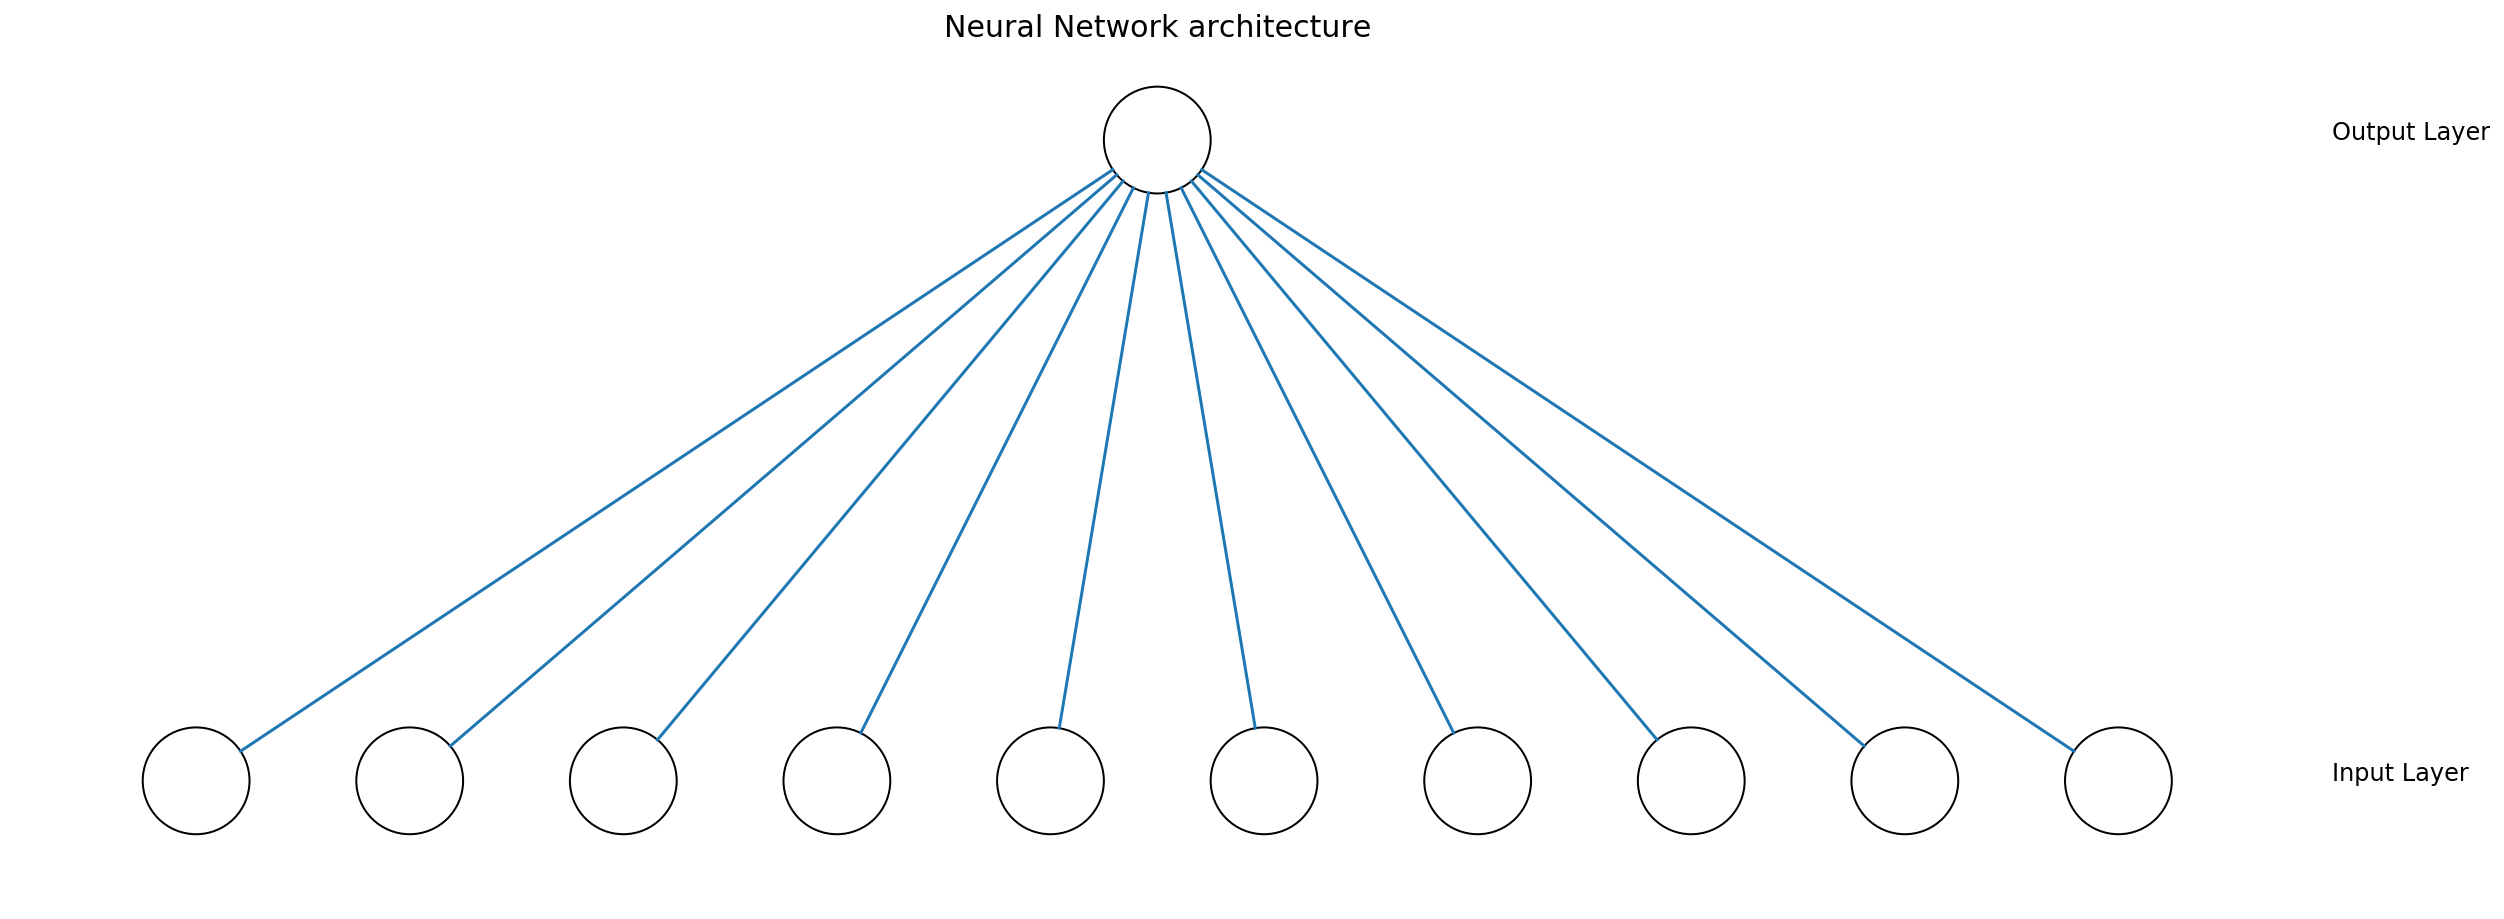

In [4]:
N = 10
network = DrawNN( [N, 1] )
network.draw()

- Cantidad de entradas como dimensión de $x$
- Cada conexión puede pensarse como que multiplica la entrada $x_j$ por $\theta_j$
- La capa de salida suma todo más el **bias** ($\theta_0$) a esto se lo llama **logits**
- Le aplico la **función de activación** (sigmoidea en este caso) a los **logits** y obtengo la estimación de la probabilidad

In [5]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [6]:
import numpy as np
x = np.linspace(-10,10, 100)
y = sigmoid(x)

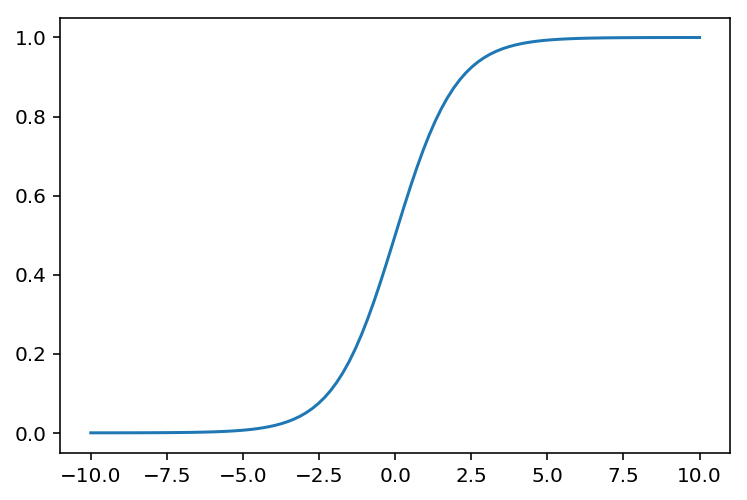

In [7]:
from matplotlib import pyplot as plt
plt.plot(x, y)
plt.show()

# Vocabulario
- bias
- función de activación
- logits
- función de costo
- métrica
- batch size
- sigmoidea
- observación
- pesos
- parámetros
- hiperparametros
- Entropía cruzada

# Ejemplo con Keras

In [9]:
X = np.load('X_lin.npy')
y = np.load('y_lin.npy')

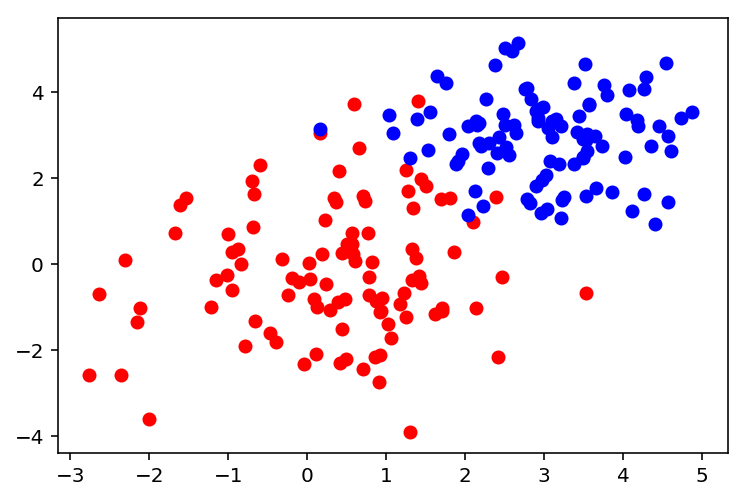

In [10]:
plt.scatter(X[np.where(y==0),0], X[np.where(y==0),1], c='r')
plt.scatter(X[np.where(y==1),0], X[np.where(y==1),1], c='b')
plt.show()

- Cuanto vale N?
- Cuantas observaciones tengo?

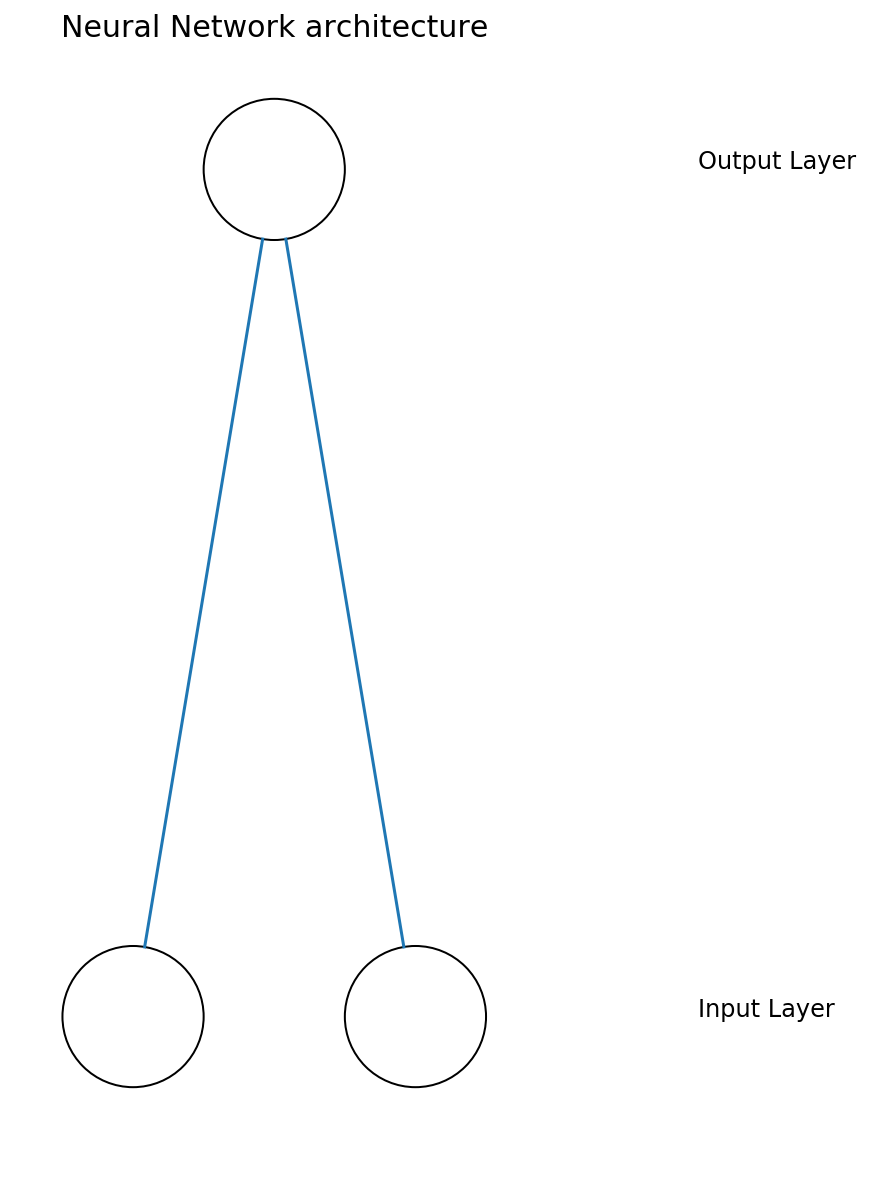

In [317]:
N = 2
network = DrawNN( [N, 1] )
network.draw()

In [47]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D
from keras.optimizers import Adam, SGD

In [59]:
model = Sequential()
model.add(Dense(1, input_shape=(2,) , activation='sigmoid', ))

In [60]:
# Variar learning rate
opt = Adam(lr=0.1)
model.compile(optimizer=opt,loss='binary_crossentropy', metrics=['accuracy'])

In [61]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [93]:
model.fit(X, y, epochs=5, batch_size=len(X))

Epoch 1/5
200/200 [==============================] - 0s 9us/step - loss: 0.0883 - acc: 0.9700
Epoch 2/5
200/200 [==============================] - 0s 7us/step - loss: 0.0891 - acc: 0.9700
Epoch 3/5
200/200 [==============================] - 0s 7us/step - loss: 0.0899 - acc: 0.9650
Epoch 4/5
200/200 [==============================] - 0s 6us/step - loss: 0.0907 - acc: 0.9650
Epoch 5/5
200/200 [==============================] - 0s 6us/step - loss: 0.0913 - acc: 0.9650


In [68]:
titas = model.get_weights()
titas

[array([[0.7399187],
        [0.9804977]], dtype=float32), array([-2.149293], dtype=float32)]

Calculo recta estimada:

In [69]:
x1_lin = np.linspace(-3,5, 100)
x2_lin = - titas[0][0][0]*x1_lin/titas[0][1][0] - titas[1][0]

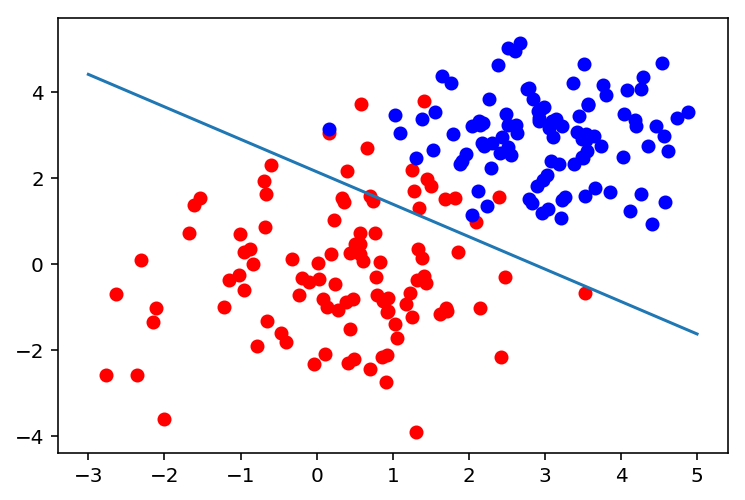

In [70]:
plt.scatter(X[np.where(y==0),0], X[np.where(y==0),1], c='r')
plt.scatter(X[np.where(y==1),0], X[np.where(y==1),1], c='b')
plt.plot(x1_lin, x2_lin)
plt.show()

- Que pasa con los distintos learning rates?
- Distintos optimizadores?
- Inicialización (siempre que lo corro con los mismos hiperparametros da lo mismo?)
- Explicar batch size

# Dataset linealmente no separable

In [73]:
folder = 'chips/'
X_train = np.load(folder+'X_train.npy')
X_test = np.load(folder+'X_test.npy')
y_train = np.load(folder+'y_train.npy') 
y_test = np.load(folder+'y_test.npy')

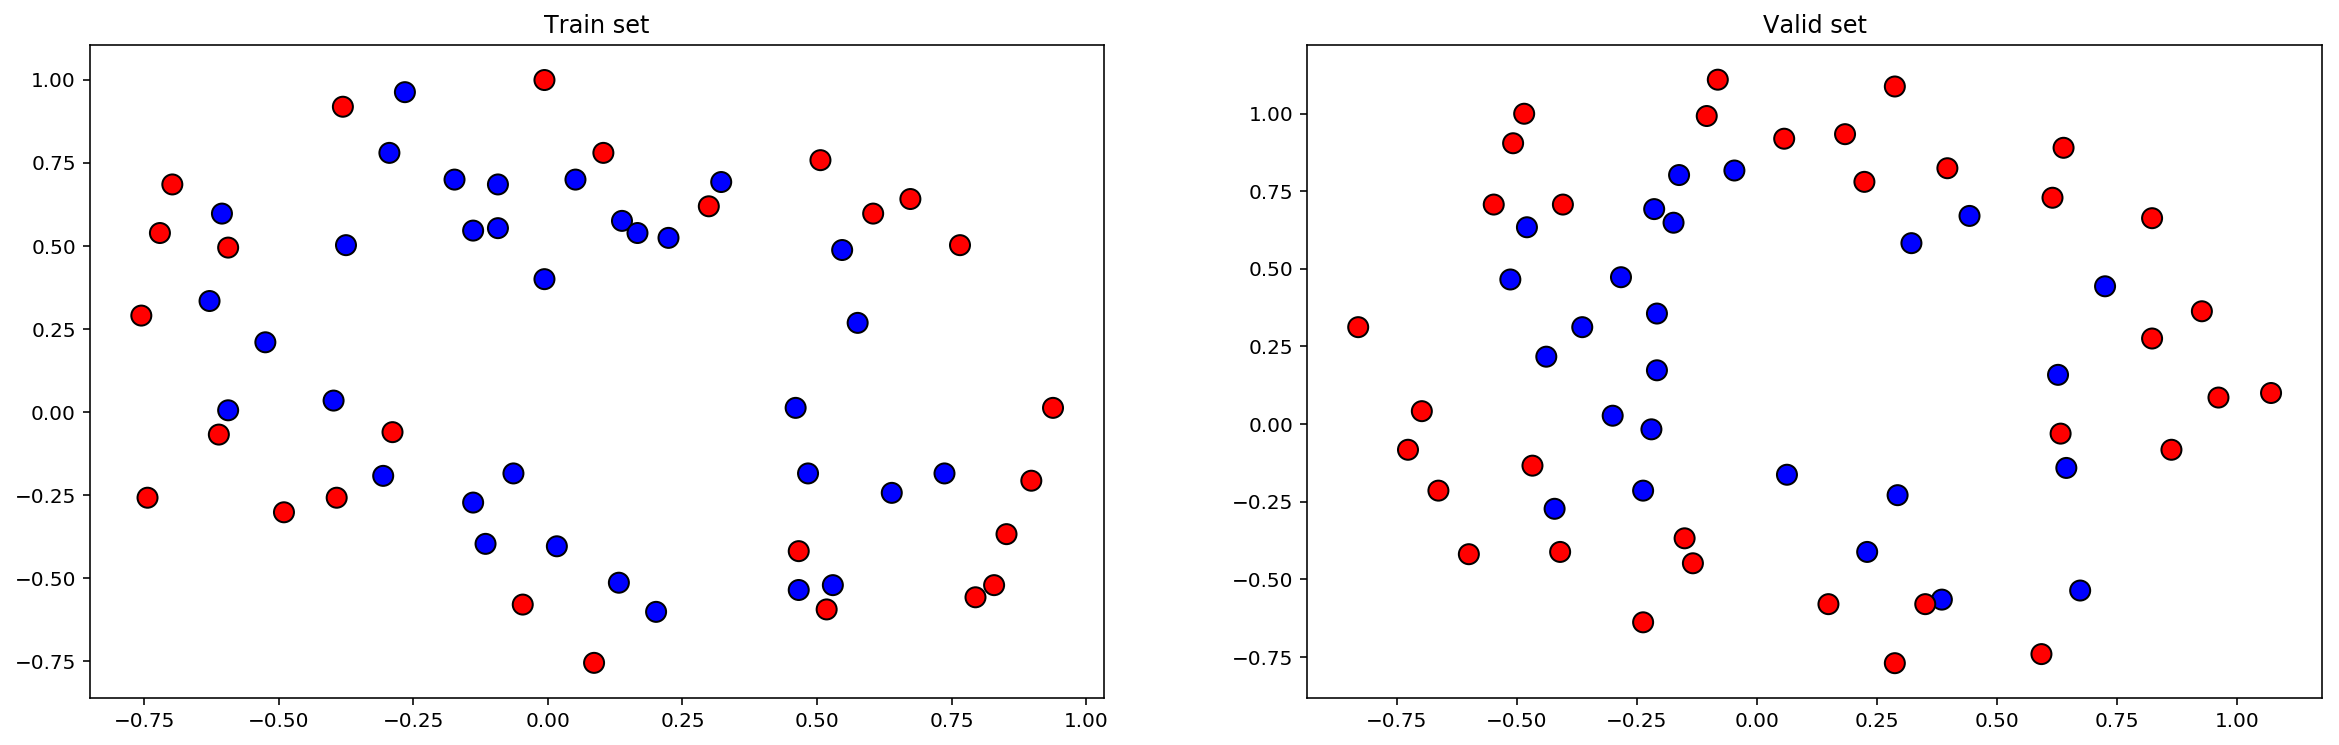

In [74]:
import reg_helper as RHelper
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
RHelper.plot_boundaries(X_train, y_train, ax=ax1)
RHelper.plot_boundaries(X_test, y_test, ax=ax2)
ax1.set_title('Train set')
ax2.set_title('Valid set')
plt.show()

Dataset 

In [75]:
model_2 = Sequential()
model_2.add(Dense(1, input_shape=(2,) , activation='sigmoid'))

In [76]:
opt = Adam()
model_2.compile(optimizer=opt,loss='binary_crossentropy', metrics=['accuracy'])

In [77]:
from fnn_helper import PlotLosses

In [78]:
plot_losses = PlotLosses(plot_interval=1, evaluate_interval=None)

In [84]:
model_2.fit(X_train, y_train, epochs=200, batch_size=len(X_train), callbacks=[plot_losses])

KeyboardInterrupt: 

In [80]:
from reg_helper import  plot_boundaries_keras

In [81]:
model_2.predict(X_train)[:10]

array([[0.3772137 ],
       [0.5529307 ],
       [0.46317264],
       [0.45602494],
       [0.59206545],
       [0.4373534 ],
       [0.6226943 ],
       [0.5144655 ],
       [0.62804794],
       [0.6088155 ]], dtype=float32)

In [82]:
model_2.evaluate(X_train, y_train)

59/59 [==============================] - 0s 731us/step


[0.7190215971510289, 0.49152542170831715]

59/59 [==============================] - 0s 30us/step
(18630, 1)
59/59 [==============================] - 0s 26us/step
(21024, 1)


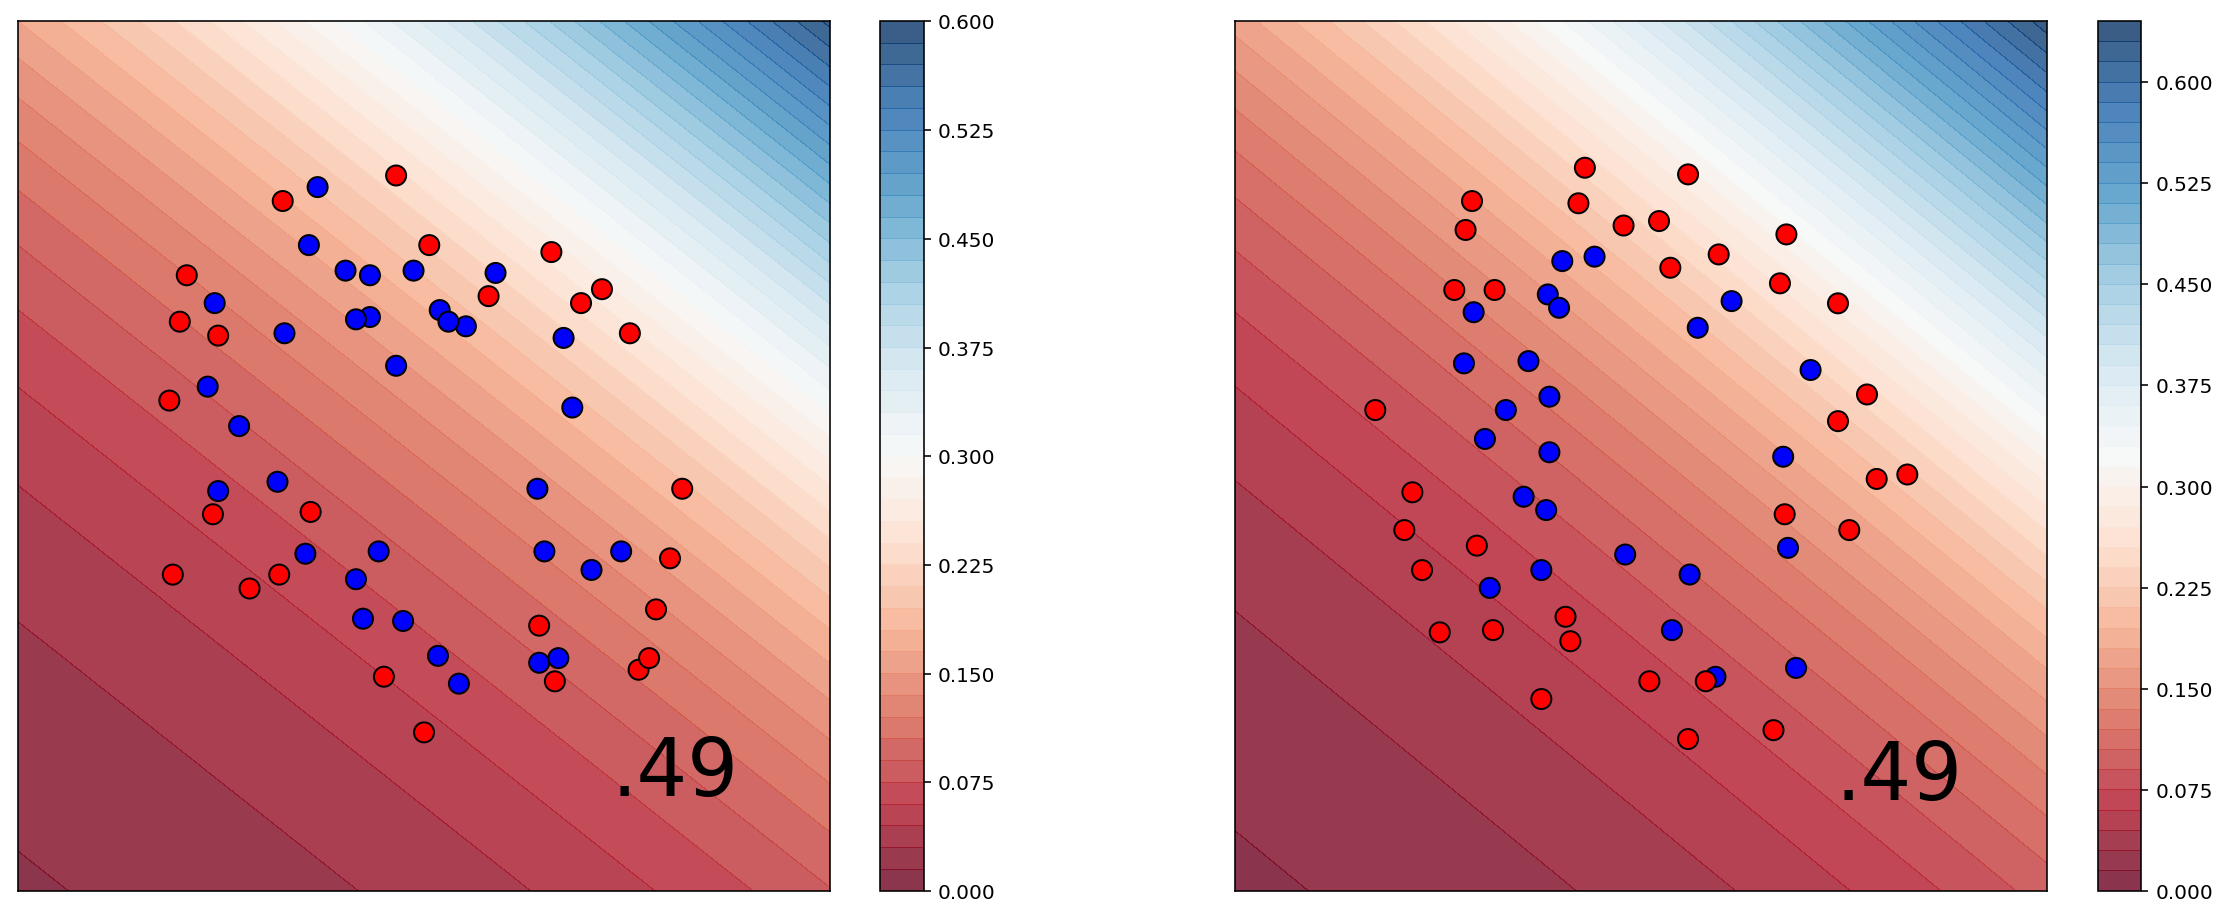

In [83]:
f, ax = plt.subplots(1,2, figsize=(20,8))
plot_boundaries_keras(X_train, y_train, score=model_2.evaluate(X_train, y_train)[1], probability_func=model.predict, ax=ax[0])
plot_boundaries_keras(X_test, y_test, score=model_2.evaluate(X_train, y_train)[1], probability_func=model.predict, ax=ax[1])
plt.show()

# Agregamos una capa oculta

https://en.wikipedia.org/wiki/Universal_approximation_theorem

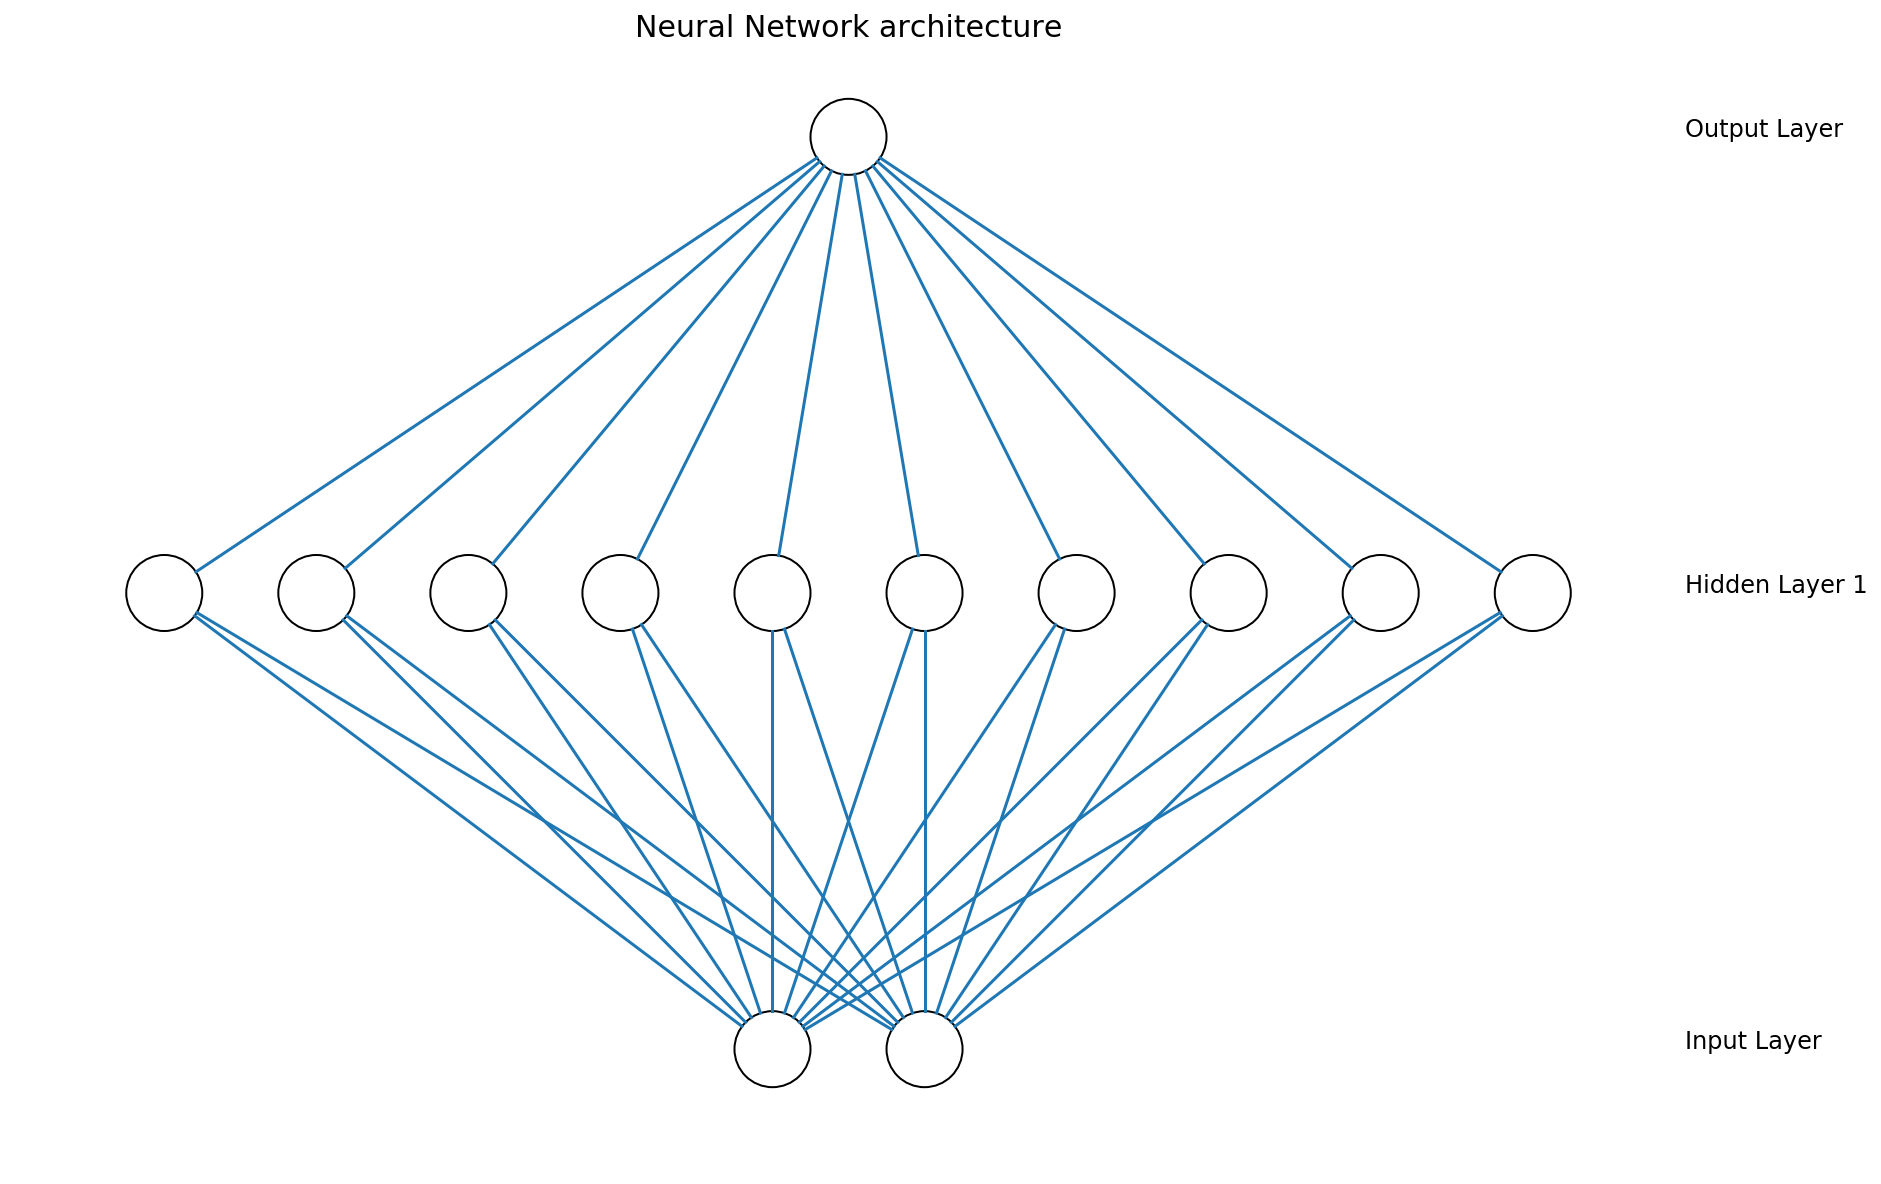

In [425]:
N = 2
network = DrawNN( [N,10, 1] )
network.draw()

In [85]:
model_hidden = Sequential()
model_hidden.add(Dense(10, activation='relu', input_shape=(2,)))
model_hidden.add(Dense(1 , activation='sigmoid'))

In [86]:
model_hidden.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 10)                30        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 11        
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [87]:
opt = Adam(lr=0.1)
model_hidden.compile(optimizer=opt,loss='binary_crossentropy', metrics=['accuracy'])

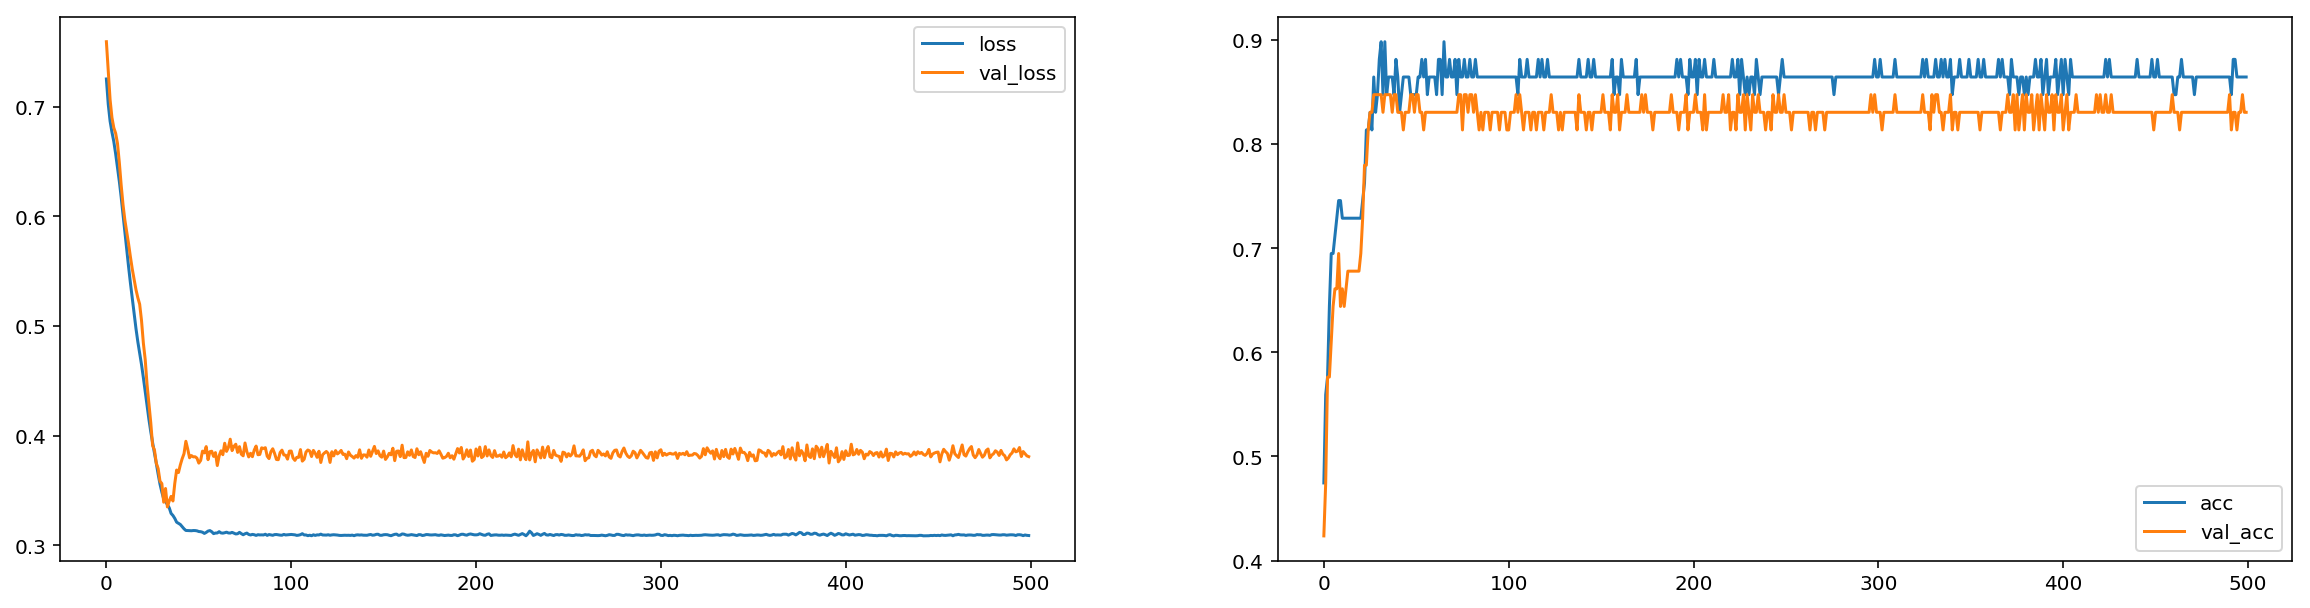

In [88]:
model_hidden.fit(X_train, y_train, epochs=500, batch_size=len(X_train), callbacks=[plot_losses], validation_data=(X_test, y_test))

- Arrancar con lr = 0.1 y Adam
- Bajarla 10 veces

59/59 [==============================] - 0s 47us/step
(18630, 1)
59/59 [==============================] - 0s 26us/step
(21024, 1)


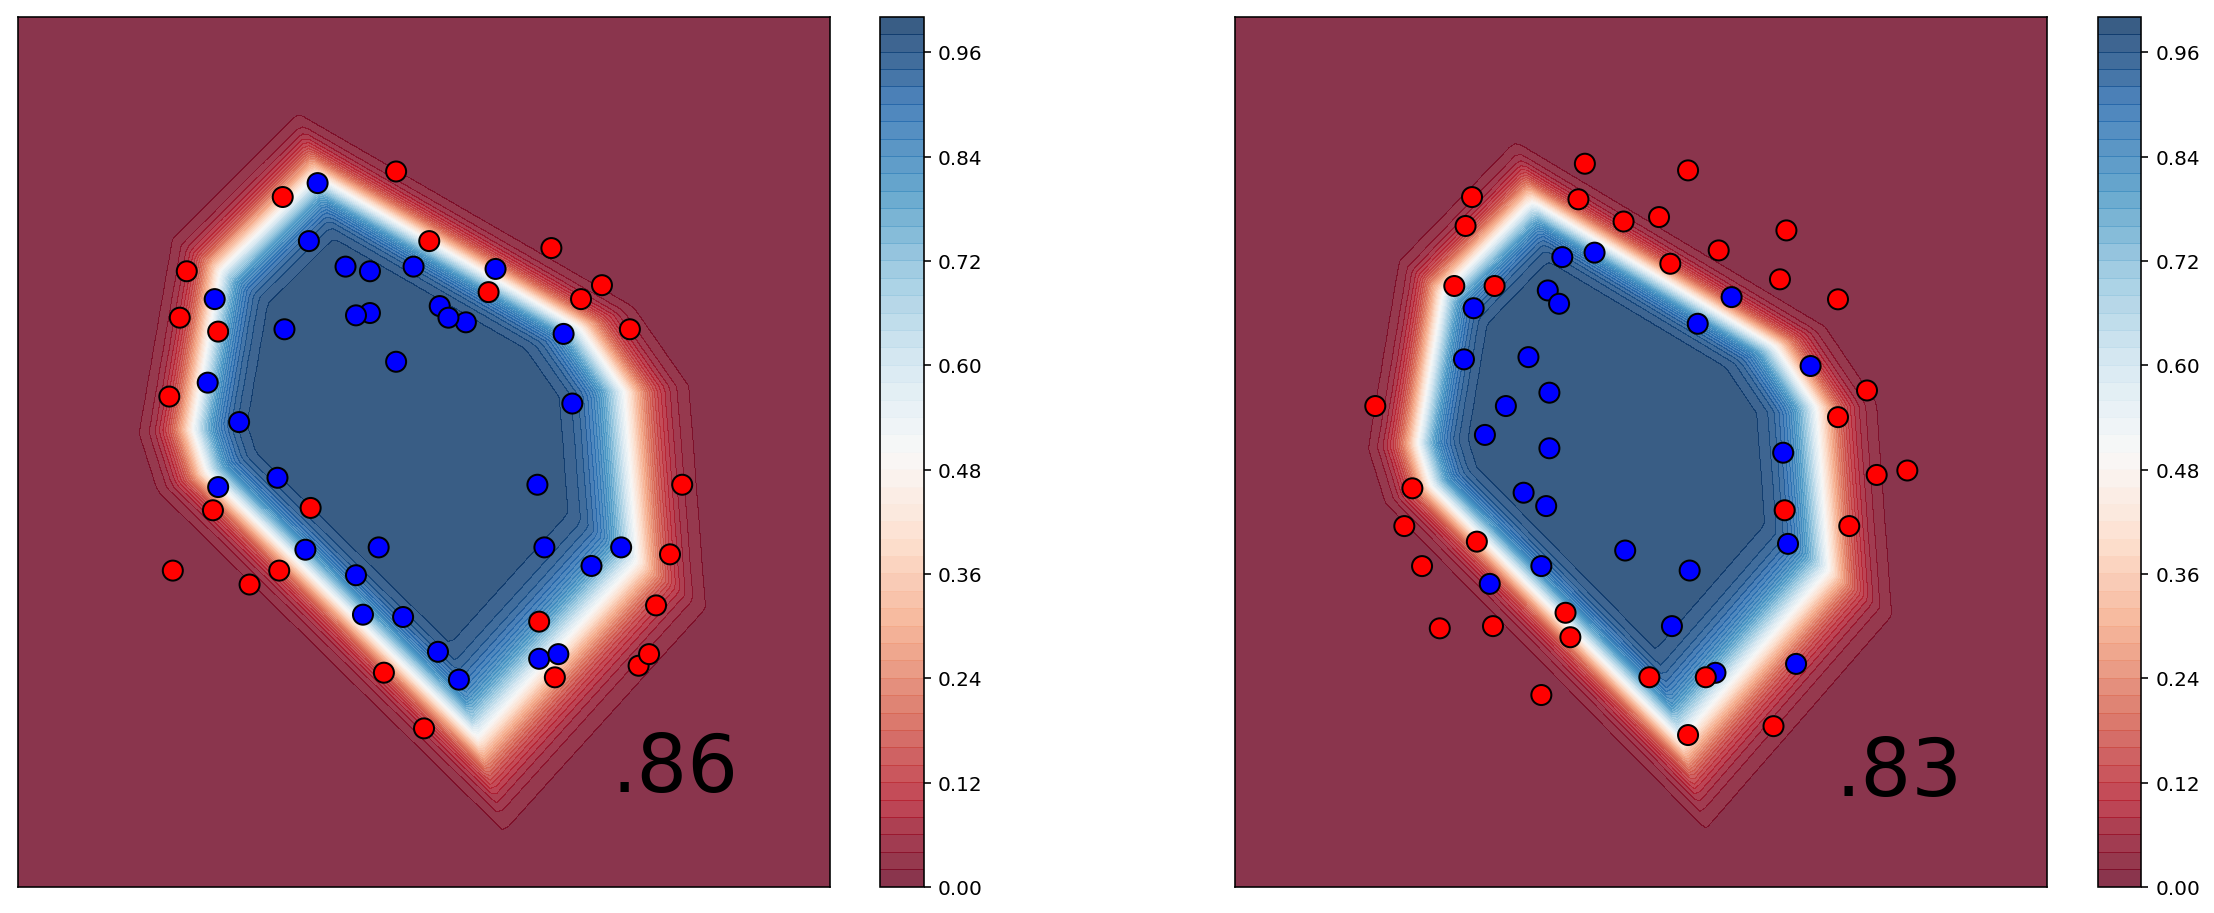

In [89]:
f, ax = plt.subplots(1,2, figsize=(20,8))
plot_boundaries_keras(X_train, y_train, score=model_hidden.evaluate(X_train, y_train)[1], probability_func=model_hidden.predict, ax=ax[0])
plot_boundaries_keras(X_test, y_test, score=model_hidden.evaluate(X_test, y_test)[1], probability_func=model_hidden.predict, ax=ax[1])
plt.show()

# Que hiperparametros tengo para jugar?

- Learning Rate
- Cantidad de neuronas en la capa oculta
- Optimizador
- Función de activación
- Batch size
- Método de regularización (A estudiar mas adelante)

In [ ]:
def generate_simple_dataset():
    X1 = np.random.multivariate_normal([0,0], [[2, 0],[0,2]], 100)
    X2 = np.random.multivariate_normal([3,3], [[1, 0],[0,1]], 100)
    X = np.vstack([X1, X2])
    y = np.ones(len(X))
    y[0:len(X1)] = 0
    np.save('X_lin', X)
    np.save('y_lin', y)